In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Social_Network_ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


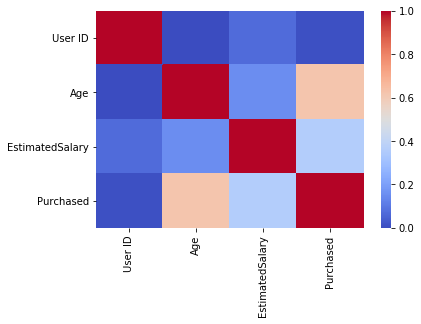

In [8]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

In [11]:
df.drop('User ID', axis = 1, inplace =True)

In [12]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [13]:
df['male'] = pd.get_dummies(df['Gender'], drop_first = True)

In [52]:
df.drop('Gender', axis = 1, inplace =True)

KeyError: "['Gender'] not found in axis"

In [53]:
df.drop('male', axis = 1, inplace =True)

In [54]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
ss = StandardScaler()

In [55]:
scaled_array = ss.fit_transform(df.drop('Purchased', axis = 1))

In [56]:
X = pd.DataFrame(data = scaled_array, columns = df.columns[:-1])

In [57]:
X.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [25]:
y = df['Purchased']

In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [27]:
X.head()

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204


In [44]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
model = DecisionTreeClassifier()

In [61]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
ypred = model.predict(X_test)

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model = RandomForestClassifier(n_estimators = 60) # n_estimator is used to decide how many times it has to perform the classification i.e. nuber of trees.

In [66]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
ypred = model.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix,classification_report

In [71]:
cm = confusion_matrix(y_test, ypred)

In [72]:
cm

array([[71,  4],
       [11, 34]], dtype=int64)